<a href="https://colab.research.google.com/github/manliofrp/Actividad_5/blob/main/Actividad5_Equipo3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importamos las librerías a utilizar en el reporte
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Distintas gráficas y bases de datos
from pandas import DataFrame

#**Preprocesamiento** del archivo **"California_EUA.csv"**

##Leer el archivo

In [ ]:
#Leemos el archivo y lo asignamos a un dataframe
dfeua = pd.read_csv("California_EUA.csv")

#Visualizamos el frame
dfeua.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,958.0,https://www.airbnb.com/rooms/958,2.020000e+13,06/03/2023,city scrape,"Bright, Modern Garden Unit - 1BR/1BTH",Our bright garden unit overlooks a lovely back...,Quiet cul de sac in friendly neighborhood<br /...,https://a0.muscache.com/pictures/b7c2a199-4c17...,1169,...,4.88,4.98,4.76,City Registration Pending,f,1,1,0,0,2.31
1,5858.0,https://www.airbnb.com/rooms/5858,2.020000e+13,06/03/2023,city scrape,Creative Sanctuary,We live in a large Victorian house on a quiet ...,I love how our neighborhood feels quiet but is...,https://a0.muscache.com/pictures/17714/3a7aea1...,8904,...,4.85,4.77,4.68,NaN,f,1,1,0,0,0.66
2,8142.0,https://www.airbnb.com/rooms/8142,2.020000e+13,06/03/2023,city scrape,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"N Juda Muni, Bus and UCSF Shuttle.<br /><br />...",https://a0.muscache.com/pictures/12d8bff0-1698...,21994,...,4.78,4.67,4.67,NaN,f,13,0,13,0,0.09
3,8339.0,https://www.airbnb.com/rooms/8339,2.020000e+13,06/03/2023,city scrape,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,24215,...,5.00,4.94,4.75,STR-0000264,f,2,2,0,0,0.17
4,8739.0,https://www.airbnb.com/rooms/8739,2.020000e+13,06/03/2023,city scrape,"Mission Sunshine, with Private Bath","Welcome to ""The Mission,"" the sunniest neighbo...",Located between Valencia Street and Dolores Pa...,https://a0.muscache.com/pictures/80811/7a57d0e...,7149,...,4.96,4.93,4.74,STR-0000028,f,2,0,2,0,4.65


##Filtros

- Un dataframe con las columnas seleccionadas y que contenga las filas con "hotel room" en la columna "room_type"

- Otro dataframe con las columnas seleccionadas y que contenga las filas con "Entire home/apt" en la columna "room_type"


In [ ]:
#Valores en la columna "room_type"
print(dfeua["room_type"].value_counts())

Entire home/apt    4458
Private room       2359
Shared room          67
Hotel room           52
Name: room_type, dtype: int64


In [ ]:
#Seleccionamos las columnas de interés para el análisis
columnas = ["number_of_reviews","host_acceptance_rate","host_response_rate","price","review_scores_location","review_scores_cleanliness","availability_365","reviews_per_month","review_scores_communication"]

In [ ]:
#Transformamos las columnas tipo objeto a numéricas

#Columna price (Eliminamos $ y comas)
dfeua["price"] = dfeua["price"].str.replace("$","")
dfeua["price"] = dfeua["price"].str.replace(",","")

#Columna host_acceptance_rate (Eliminamos %)
dfeua["host_acceptance_rate"] = dfeua["host_acceptance_rate"].str.replace("%","")

#Columna host_response_rate (Eliminamos %)
dfeua["host_response_rate"] = dfeua["host_response_rate"].str.replace("%","")

#Convertimos las columnas de tipo objeto a numéricas
dfeua["host_acceptance_rate"] = dfeua["host_acceptance_rate"].astype(float)
dfeua["host_response_rate"] = dfeua["host_response_rate"].astype(float)
dfeua["price"] = dfeua["price"].astype(float)

<ipython-input-5-91e1ed0813a0>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfeua["price"] = dfeua["price"].str.replace("$","")


In [ ]:
#Dataframe que tenga las columna de interés y las filas que contengan "Private room" en la columna "room_type
dfeua_privateroom = dfeua[columnas][dfeua["room_type"]=="Private room"]

#Dataframe que tenga las columna de interés y las filas que contengan "Entire home/apt" en la columna "room_type
dfeua_entirehome = dfeua[columnas][dfeua["room_type"]=="Entire home/apt"]

#Información del frame filtrado
print(dfeua_privateroom.info())
print()
print(dfeua_entirehome.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2359 entries, 2 to 6934
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            2359 non-null   int64  
 1   host_acceptance_rate         2024 non-null   float64
 2   host_response_rate           1993 non-null   float64
 3   price                        2359 non-null   float64
 4   review_scores_location       1914 non-null   float64
 5   review_scores_cleanliness    1915 non-null   float64
 6   availability_365             2359 non-null   int64  
 7   reviews_per_month            1921 non-null   float64
 8   review_scores_communication  1915 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 184.3 KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4458 entries, 0 to 6935
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       

##Valores nulos

In [ ]:
#Identificación de valores nulos de ambos frames
print("Datos nulos:")
print()
print(dfeua_privateroom.isnull().sum())
print()
print(dfeua_entirehome.isnull().sum())
print()

#Remplazar todos los valores nulos en los frames con el promedio de cada columna
dfeua_privateroom_sinnulos = dfeua_privateroom.fillna(round(dfeua[columnas].mean(),2))
dfeua_entirehome_sinnulos = dfeua_entirehome.fillna(round(dfeua[columnas].mean(),2))

#Comprobación
print("Comprobación Datos nulos:")
print()
print(dfeua_privateroom_sinnulos.isnull().sum())
print()
print(dfeua_entirehome_sinnulos.isnull().sum())
print()

Datos nulos:

number_of_reviews                0
host_acceptance_rate           335
host_response_rate             366
price                            0
review_scores_location         445
review_scores_cleanliness      444
availability_365                 0
reviews_per_month              438
review_scores_communication    444
dtype: int64

number_of_reviews                0
host_acceptance_rate           423
host_response_rate             609
price                            0
review_scores_location         882
review_scores_cleanliness      882
availability_365                 0
reviews_per_month              867
review_scores_communication    882
dtype: int64

Comprobación Datos nulos:

number_of_reviews              0
host_acceptance_rate           0
host_response_rate             0
price                          0
review_scores_location         0
review_scores_cleanliness      0
availability_365               0
reviews_per_month              0
review_scores_communication    0
dtyp

##Valores atípicos

###Diagramas de cajas y bigotes

<Figure size 1500x800 with 0 Axes>

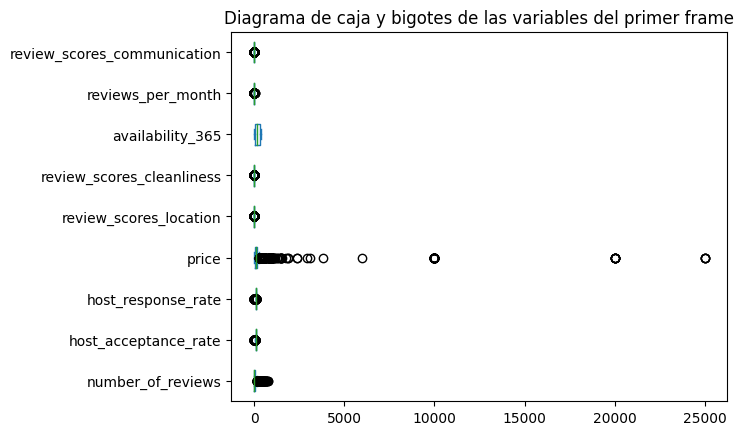

<Figure size 1500x800 with 0 Axes>

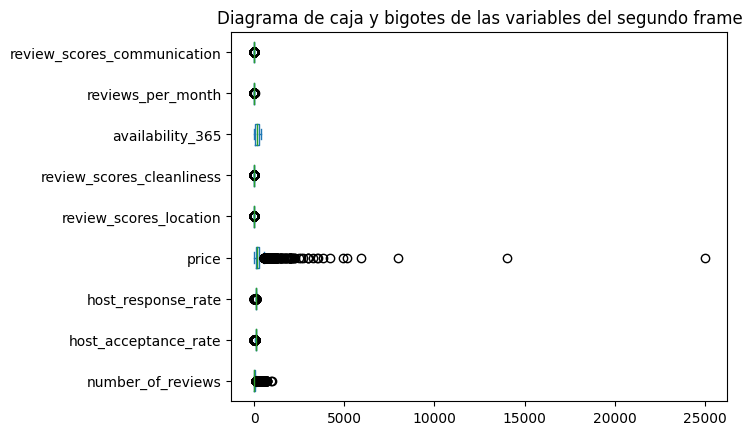

In [ ]:
#Boxplot de las variables del primer frame para visuaizar los valores atípicos
fig = plt.figure(figsize=(15,8))
dfeua_privateroom_sinnulos.plot(kind="box",vert=False)
plt.title("Diagrama de caja y bigotes de las variables del primer frame")
plt.show()

#Boxplot de las variables del segundo frame para visuaizar los valores atípicos
fig = plt.figure(figsize=(15,8))
dfeua_entirehome_sinnulos.plot(kind="box",vert=False)
plt.title("Diagrama de caja y bigotes de las variables del segundo frame")
plt.show()

###Eliminación de outliers con método intercuartil

####Primer DataFrame

- Frame con unicamente las filas con "Private room" en la columna "room type"

In [ ]:
y = dfeua_privateroom_sinnulos #Dataframe entero

percentile25 = y.quantile(0.25) #Calculamos el Q1
percentile75 = y.quantile(0.75) #Calculamos el Q3

iqr = percentile75 - percentile25 #50% de los datos

limite_superior_iqr = percentile75 + 1.5*iqr #Limite superior
limite_inferior_iqr = percentile25 - 1.5*iqr #Limite inferior

#Límites superiores e inferiores de cada columna
print("Límite superior:")
print(round(limite_superior_iqr,1))
print()
print("Límite inferior:")
print(round(limite_inferior_iqr,1))

Límite superior:
number_of_reviews              158.5
host_acceptance_rate           118.0
host_response_rate             106.5
price                          296.5
review_scores_location           5.3
review_scores_cleanliness        5.4
availability_365               723.0
reviews_per_month                3.7
review_scores_communication      5.2
dtype: float64

Límite inferior:
number_of_reviews              -93.5
host_acceptance_rate            70.0
host_response_rate              89.1
price                          -67.5
review_scores_location           4.5
review_scores_cleanliness        4.3
availability_365              -349.0
reviews_per_month               -1.8
review_scores_communication      4.6
dtype: float64


In [ ]:
#Creamos un nuevo dataframe donde los outliers estén como datos nulos
dfeua_privateroom_sinoutliers = dfeua_privateroom_sinnulos[(dfeua_privateroom_sinnulos<=limite_superior_iqr)&(dfeua_privateroom_sinnulos>=limite_inferior_iqr)]

#Contar outliers identificados
print("Outliers:")
print(dfeua_privateroom_sinoutliers.isnull().sum())

Outliers:
number_of_reviews              263
host_acceptance_rate           189
host_response_rate             286
price                          247
review_scores_location         197
review_scores_cleanliness      203
availability_365                 0
reviews_per_month              224
review_scores_communication    262
dtype: int64


In [ ]:
#Datos limpios
#Sustituimos los outliers con el promedio de cada columna
dfeua_privateroom_clean = dfeua_privateroom_sinoutliers.copy()
dfeua_privateroom_clean = dfeua_privateroom_clean.fillna(round(dfeua[columnas].mean(),2))

#Comprobación de la eliminación de outliers
print("Comprobación outliers:")
print(dfeua_privateroom_clean.isnull().sum())

Comprobación outliers:
number_of_reviews              0
host_acceptance_rate           0
host_response_rate             0
price                          0
review_scores_location         0
review_scores_cleanliness      0
availability_365               0
reviews_per_month              0
review_scores_communication    0
dtype: int64


In [ ]:
#Visualizacmos el frame final sin datos nulos, sin outliers y con las filas y columas de interés para el análisis
dfeua_privateroom_clean

,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
2,9.00,73.00,100.00,56.0,4.67,4.44,365,0.09,4.78
4,47.94,90.00,100.00,110.0,4.93,4.94,159,1.32,4.96
6,80.00,88.01,100.00,100.0,4.77,4.75,331,0.74,4.78
7,19.00,100.00,100.00,95.0,4.79,5.00,365,0.12,5.00
11,121.00,100.00,100.00,55.0,4.82,4.45,55,0.85,4.81
...,...,...,...,...,...,...,...,...,...
6927,1.00,98.00,100.00,80.0,5.00,5.00,316,1.00,5.00
6929,0.00,97.00,100.00,40.0,4.79,4.77,336,1.32,4.85
6930,0.00,100.00,100.00,56.0,4.79,4.77,339,1.32,4.85
6933,0.00,88.01,95.64,104.0,4.79,4.77,364,1.32,4.85


####Segundo DataFrame

- Frame con unicamente las filas con "Entire home/apt" en la columna "room type"

In [ ]:
y = dfeua_entirehome_sinnulos #Dataframe entero

percentile25 = y.quantile(0.25) #Calculamos el Q1
percentile75 = y.quantile(0.75) #Calculamos el Q3

iqr = percentile75 - percentile25 #50% de los datos

limite_superior_iqr = percentile75 + 1.5*iqr #Limite superior
limite_inferior_iqr = percentile25 - 1.5*iqr #Limite inferior

#Límites superiores e inferiores de cada columna
print("Límite superior:")
print(round(limite_superior_iqr,1))
print()
print("Límite inferior:")
print(round(limite_inferior_iqr,1))

Límite superior:
number_of_reviews               98.5
host_acceptance_rate           124.0
host_response_rate             106.0
price                          550.0
review_scores_location           5.3
review_scores_cleanliness        5.3
availability_365               620.0
reviews_per_month                2.9
review_scores_communication      5.2
dtype: float64

Límite inferior:
number_of_reviews              -57.5
host_acceptance_rate            60.0
host_response_rate              90.0
price                         -130.0
review_scores_location           4.5
review_scores_cleanliness        4.4
availability_365              -292.0
reviews_per_month               -1.4
review_scores_communication      4.6
dtype: float64


In [ ]:
#Creamos un nuevo dataframe donde los outliers estén como datos nulos
dfeua_entirehome_sinoutliers = dfeua_entirehome_sinnulos[(dfeua_entirehome_sinnulos<=limite_superior_iqr)&(dfeua_entirehome_sinnulos>=limite_inferior_iqr)]

#Contar outliers identificados
print("Outliers:")
print(dfeua_entirehome_sinoutliers.isnull().sum())

Outliers:
number_of_reviews              588
host_acceptance_rate           386
host_response_rate             252
price                          313
review_scores_location         304
review_scores_cleanliness      292
availability_365                 0
reviews_per_month              501
review_scores_communication    291
dtype: int64


In [ ]:
#Datos limpios
#Sustituimos los outliers con el promedio de cada columna
dfeua_entirehome_clean = dfeua_entirehome_sinoutliers.copy()
dfeua_entirehome_clean = dfeua_entirehome_clean.fillna(round(dfeua[columnas].mean(),2))

#Comprobación de la eliminación de outliers
print("Comprobación outliers:")
print(dfeua_entirehome_clean.isnull().sum())

Comprobación outliers:
number_of_reviews              0
host_acceptance_rate           0
host_response_rate             0
price                          0
review_scores_location         0
review_scores_cleanliness      0
availability_365               0
reviews_per_month              0
review_scores_communication    0
dtype: int64


In [ ]:
#Visualizacmos el frame final sin datos nulos, sin outliers y con las filas y columas de interés para el análisis
dfeua_entirehome_clean

,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
0,47.94,100.00,100.00,202.00,4.98,4.92,128,2.31,4.88
1,47.94,71.00,95.64,235.00,4.77,4.87,365,0.66,4.85
3,28.00,88.01,100.00,330.09,4.94,5.00,365,0.17,5.00
5,47.94,95.00,100.00,259.00,4.78,4.88,32,1.69,4.97
8,56.00,61.00,100.00,425.00,4.91,4.86,7,0.44,4.91
...,...,...,...,...,...,...,...,...,...
6923,0.00,100.00,100.00,110.00,4.79,4.77,26,1.32,4.85
6928,0.00,88.01,100.00,175.00,4.79,4.77,248,1.32,4.85
6931,0.00,100.00,100.00,164.00,4.79,4.77,57,1.32,4.85
6932,1.00,88.01,95.64,228.00,5.00,5.00,356,1.00,5.00


#**Preprocesamiento** del archivo **"DF_Mexico.csv"**

##Leer el archivo

In [ ]:
#Leemos el archivo y lo asignamos a un dataframe
dfmx = pd.read_csv("DF_Mexico.csv")

#Visualizamos el frame
dfmx.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,...,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,...,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,...,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-29,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Centro comercial Santa Fe, parque interlomas y...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
4,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.48,NaN,f,12,3,2,0,0.46


##Filtros

- Un dataframe con las columnas seleccionadas y que contenga las filas con "Private room" en la columna "room_type"

- Otro dataframe con las columnas seleccionadas y que contenga las filas con "Entire home/apt" en la columna "room_type"


In [ ]:
#Valores en la columna "room_type"
print(dfmx["room_type"].value_counts())

Entire home/apt    15602
Private room        8202
Shared room          293
Hotel room           127
Name: room_type, dtype: int64


In [ ]:
#Seleccionamos las columnas de interés para el análisis
columnas = ["number_of_reviews","host_acceptance_rate","host_response_rate","price","review_scores_location","review_scores_cleanliness","availability_365","reviews_per_month","review_scores_communication"]

In [ ]:
#Transofrmamos las columnas de tipo objeto a numéricas
#Columna price (Eliminamos $ y comas)
dfmx["price"] = dfmx["price"].str.replace("$","")
dfmx["price"] = dfmx["price"].str.replace(",","")

#Columna host_acceptance_rate (Eliminamos %)
dfmx["host_acceptance_rate"] = dfmx["host_acceptance_rate"].str.replace("%","")

#Columna host_response_rate (Eliminamos %)
dfmx["host_response_rate"] = dfmx["host_response_rate"].str.replace("%","")

#Convertimos las columnas de tipo objeto a numéricas
dfmx["host_acceptance_rate"] = dfmx["host_acceptance_rate"].astype(float)
dfmx["host_response_rate"] = dfmx["host_response_rate"].astype(float)
dfmx["price"] = dfmx["price"].astype(float)

<ipython-input-20-29d60ba9695a>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dfmx["price"] = dfmx["price"].str.replace("$","")


In [ ]:
#Dataframe que tenga las columna de interés y las filas que contengan "hotel room" en la columna "room_type
dfmx_privateroom = dfmx[columnas][dfmx["room_type"]=="Private room"]

#Dataframe que tenga las columna de interés y las filas que contengan "Entire home/apt" en la columna "room_type
dfmx_entirehome = dfmx[columnas][dfmx["room_type"]=="Entire home/apt"]

#Información del frame filtrado
print(dfmx_privateroom.info())
print()
print(dfmx_entirehome.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8202 entries, 7 to 24221
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            8202 non-null   int64  
 1   host_acceptance_rate         7269 non-null   float64
 2   host_response_rate           6763 non-null   float64
 3   price                        8202 non-null   float64
 4   review_scores_location       6394 non-null   float64
 5   review_scores_cleanliness    6395 non-null   float64
 6   availability_365             8202 non-null   int64  
 7   reviews_per_month            6426 non-null   float64
 8   review_scores_communication  6395 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 640.8 KB
None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15602 entries, 0 to 24223
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                    

##Valores nulos

In [ ]:
#Identificación de valores nulos de ambos frames
print("Datos nulos:")
print()
print(dfmx_privateroom.isnull().sum())
print()
print(dfmx_entirehome.isnull().sum())
print()

#Remplazar todos los valores nulos en los frames con el promedio de cada columna
dfmx_privateroom_sinnulos = dfmx_privateroom.fillna(round(dfmx[columnas].mean(),2))
dfmx_entirehome_sinnulos = dfmx_entirehome.fillna(round(dfmx[columnas].mean(),2)) #method="ffill")#

#Comprobación
print("Comprobación Datos nulos:")
print()
print(dfmx_privateroom_sinnulos.isnull().sum())
print()
print(dfmx_entirehome_sinnulos.isnull().sum())
print()

Datos nulos:

number_of_reviews                 0
host_acceptance_rate            933
host_response_rate             1439
price                             0
review_scores_location         1808
review_scores_cleanliness      1807
availability_365                  0
reviews_per_month              1776
review_scores_communication    1807
dtype: int64

number_of_reviews                 0
host_acceptance_rate           1067
host_response_rate             1585
price                             0
review_scores_location         1714
review_scores_cleanliness      1713
availability_365                  0
reviews_per_month              1692
review_scores_communication    1714
dtype: int64

Comprobación Datos nulos:

number_of_reviews              0
host_acceptance_rate           0
host_response_rate             0
price                          0
review_scores_location         0
review_scores_cleanliness      0
availability_365               0
reviews_per_month              0
review_scores_commu

##Valores atípicos

###Diagramas de cajas y bigotes

<Figure size 1500x800 with 0 Axes>

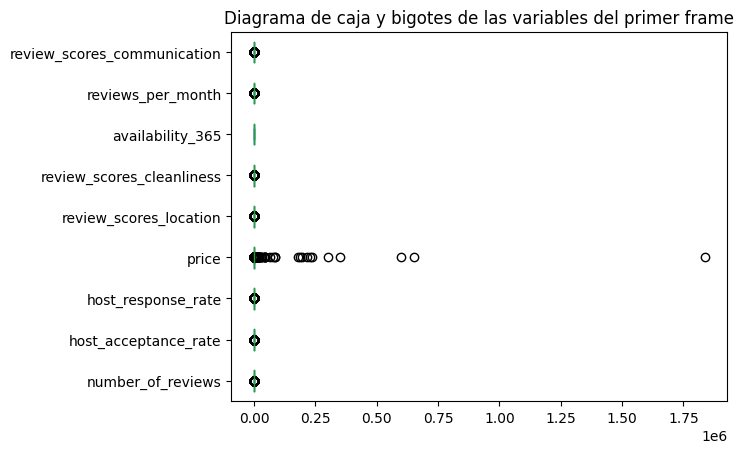

<Figure size 1500x800 with 0 Axes>

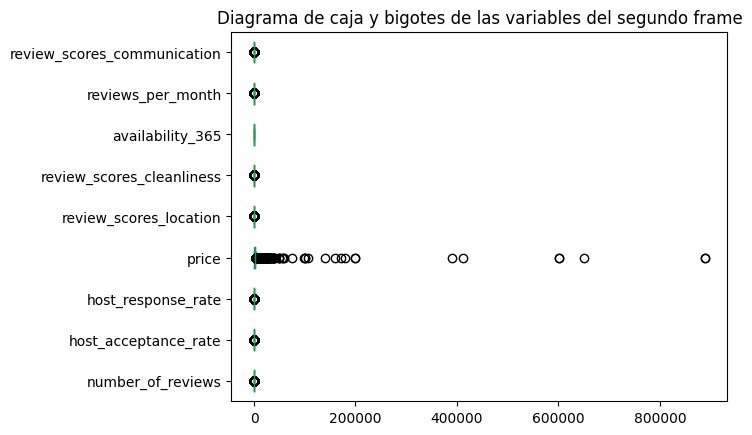

In [ ]:
#Boxplot de las variables del primer frame para visuaizar los valores atípicos
fig = plt.figure(figsize=(15,8))
dfmx_privateroom_sinnulos.plot(kind="box",vert=False)
plt.title("Diagrama de caja y bigotes de las variables del primer frame")
plt.show()

#Boxplot de las variables del segundo frame para visuaizar los valores atípicos
fig = plt.figure(figsize=(15,8))
dfmx_entirehome_sinnulos.plot(kind="box",vert=False)
plt.title("Diagrama de caja y bigotes de las variables del segundo frame")
plt.show()

###Eliminación de outliers con método intercuartil

####Primer DataFrame

- Frame con unicamente las filas con "Private room" en la columna "room type"

In [ ]:
y = dfmx_privateroom_sinnulos #Dataframe entero

percentile25 = y.quantile(0.25) #Calculamos el Q1
percentile75 = y.quantile(0.75) #Calculamos el Q3

iqr = percentile75 - percentile25 #50% de los datos

limite_superior_iqr = percentile75 + 1.5*iqr #Limite superior
limite_inferior_iqr = percentile25 - 1.5*iqr #Limite inferior

#Límites superiores e inferiores de cada columna
print("Límite superior:")
print(round(limite_superior_iqr,1))
print()
print("Límite inferior:")
print(round(limite_inferior_iqr,1))

Límite superior:
number_of_reviews                61.0
host_acceptance_rate            112.8
host_response_rate              108.2
price                          1460.0
review_scores_location            5.3
review_scores_cleanliness         5.4
availability_365                671.5
reviews_per_month                 3.8
review_scores_communication       5.3
dtype: float64

Límite inferior:
number_of_reviews              -35.0
host_acceptance_rate            78.6
host_response_rate              86.4
price                         -300.0
review_scores_location           4.6
review_scores_cleanliness        4.4
availability_365              -156.5
reviews_per_month               -1.7
review_scores_communication      4.6
dtype: float64


In [ ]:
#Creamos un nuevo dataframe donde los outliers estén como datos nulos
dfmx_privateroom_sinoutliers = dfmx_privateroom_sinnulos[(dfmx_privateroom_sinnulos<=limite_superior_iqr)&(dfmx_privateroom_sinnulos>=limite_inferior_iqr)]

#Contar outliers identificados
print("Outliers:")
print(dfmx_privateroom_sinoutliers.isnull().sum())

Outliers:
number_of_reviews               961
host_acceptance_rate           1300
host_response_rate             1026
price                           835
review_scores_location          688
review_scores_cleanliness       733
availability_365                  0
reviews_per_month               480
review_scores_communication     762
dtype: int64


In [ ]:
#Datos limpios
#Sustituimos los outliers con el promedio de cada columna
dfmx_privateroom_clean = dfmx_privateroom_sinoutliers.copy()
dfmx_privateroom_clean = dfmx_privateroom_clean.fillna(round(dfmx[columnas].mean(),2))

#Comprobación de la eliminación de outliers
print("Comprobación outliers:")
print(dfmx_privateroom_clean.isnull().sum())

Comprobación outliers:
number_of_reviews              0
host_acceptance_rate           0
host_response_rate             0
price                          0
review_scores_location         0
review_scores_cleanliness      0
availability_365               0
reviews_per_month              0
review_scores_communication    0
dtype: int64


In [ ]:
#Visualizacmos el frame final sin datos nulos, sin outliers y con las filas y columas de interés para el análisis
dfmx_privateroom_clean

,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
7,36.59,100.00,100.00,1089.00,4.94,4.90,168,0.94,4.95
16,5.00,91.46,94.54,726.00,4.80,4.75,363,0.04,4.60
17,5.00,91.46,94.54,375.00,4.83,4.60,284,0.04,4.80
18,0.00,91.46,94.54,1902.68,4.83,4.75,365,1.70,4.82
21,0.00,91.46,100.00,1244.00,4.83,4.75,88,1.70,4.82
...,...,...,...,...,...,...,...,...,...
24200,0.00,91.46,94.54,1280.00,4.83,4.75,301,1.70,4.82
24213,0.00,91.46,94.54,750.00,4.83,4.75,176,1.70,4.82
24215,0.00,100.00,100.00,600.00,4.83,4.75,345,1.70,4.82
24218,0.00,100.00,94.54,251.00,4.83,4.75,364,1.70,4.82


####Segundo DataFrame

- Frame con las filas con "Entire room/apt" en la columna "room type"

In [ ]:
y = dfmx_entirehome_sinnulos #Dataframe entero

percentile25 = y.quantile(0.25) #Calculamos el Q1
percentile75 = y.quantile(0.75) #Calculamos el Q3

iqr = percentile75 - percentile25 #50% de los datos

limite_superior_iqr = percentile75 + 1.5*iqr #Limite superior
limite_inferior_iqr = percentile25 - 1.5*iqr #Limite inferior

#Límites superiores e inferiores de cada columna
print("Límite superior:")
print(round(limite_superior_iqr,1))
print()
print("Límite inferior:")
print(round(limite_inferior_iqr,1))

Límite superior:
number_of_reviews               126.5
host_acceptance_rate            107.5
host_response_rate              101.5
price                          3499.4
review_scores_location            5.3
review_scores_cleanliness         5.3
availability_365                670.5
reviews_per_month                 5.1
review_scores_communication       5.3
dtype: float64

Límite inferior:
number_of_reviews              -69.5
host_acceptance_rate            87.5
host_response_rate              97.5
price                         -739.6
review_scores_location           4.6
review_scores_cleanliness        4.4
availability_365              -181.5
reviews_per_month               -1.9
review_scores_communication      4.6
dtype: float64


In [ ]:
#Creamos un nuevo dataframe donde los outliers estén como datos nulos
dfmx_entirehome_sinoutliers = dfmx_entirehome_sinnulos[(dfmx_entirehome_sinnulos<=limite_superior_iqr)&(dfmx_entirehome_sinnulos>=limite_inferior_iqr)]

#Contar outliers identificados
print("Outliers:")
print(dfmx_entirehome_sinoutliers.isnull().sum())

Outliers:
number_of_reviews              1376
host_acceptance_rate           1729
host_response_rate             3242
price                          1146
review_scores_location         1043
review_scores_cleanliness      1128
availability_365                  0
reviews_per_month               637
review_scores_communication    1116
dtype: int64


In [ ]:
#Datos limpios
#Sustituimos los outliers con el promedio de cada columna
dfmx_entirehome_clean = dfmx_entirehome_sinoutliers.copy()
dfmx_entirehome_clean = dfmx_entirehome_clean.fillna(round(dfmx[columnas].mean(),2))

#Comprobación de la eliminación de outliers
print("Comprobación outliers:")
print(dfmx_entirehome_clean.isnull().sum())

Comprobación outliers:
number_of_reviews              0
host_acceptance_rate           0
host_response_rate             0
price                          0
review_scores_location         0
review_scores_cleanliness      0
availability_365               0
reviews_per_month              0
review_scores_communication    0
dtype: int64


In [ ]:
#Visualizacmos el frame final sin datos nulos, sin outliers y con las filas y columas de interés para el análisis
dfmx_entirehome_clean

,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
0,21.0,91.46,100.00,1434.00,5.00,4.95,324,0.19,4.95
1,61.0,91.46,94.54,830.00,4.95,4.88,346,0.54,5.00
2,39.0,90.00,100.00,1469.00,4.58,4.71,87,0.31,4.92
3,0.0,91.46,94.54,1902.68,4.83,4.75,363,1.70,4.82
4,64.0,91.46,100.00,1902.68,4.98,4.70,357,0.46,4.78
...,...,...,...,...,...,...,...,...,...
24217,0.0,100.00,100.00,980.00,4.83,4.75,342,1.70,4.82
24219,0.0,100.00,100.00,760.00,4.83,4.75,352,1.70,4.82
24220,0.0,91.46,94.54,1520.00,4.83,4.75,365,1.70,4.82
24222,0.0,100.00,100.00,1200.00,4.83,4.75,344,1.70,4.82


#**Análisis** del frame  **"df_México.csv"** con las filas **"Entire home/apt"**

In [ ]:
#Correlación entre todas las variables dentro del frame
Corr_Factors_1 = dfmx_entirehome_clean.corr()
Corr_Factors_1

,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
number_of_reviews,1.000000,0.176427,0.154962,-0.074354,-0.016594,-0.025009,-0.066492,0.330611,-0.026582
host_acceptance_rate,0.176427,1.000000,0.408411,0.054329,0.009595,0.040900,0.099700,0.294530,0.012350
host_response_rate,0.154962,0.408411,1.000000,0.030871,0.043031,0.096346,0.061513,0.200693,0.109982
price,-0.074354,0.054329,0.030871,1.000000,0.204365,0.126677,0.048069,0.002396,0.046648
review_scores_location,-0.016594,0.009595,0.043031,0.204365,1.000000,0.295133,-0.047833,-0.076059,0.339796
review_scores_cleanliness,-0.025009,0.040900,0.096346,0.126677,0.295133,1.000000,-0.041465,-0.038332,0.473652
availability_365,-0.066492,0.099700,0.061513,0.048069,-0.047833,-0.041465,1.000000,0.083565,-0.096536
reviews_per_month,0.330611,0.294530,0.200693,0.002396,-0.076059,-0.038332,0.083565,1.000000,-0.093424
review_scores_communication,-0.026582,0.012350,0.109982,0.046648,0.339796,0.473652,-0.096536,-0.093424,1.000000


<Axes: >

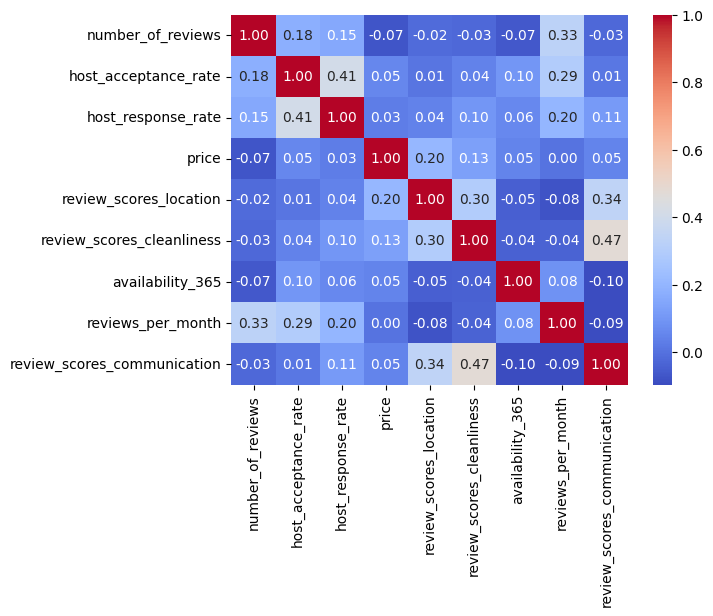

In [ ]:
#Mapa de calor de los coeficiente de correlación con el valor
Heat_Map_1 = sns.heatmap(Corr_Factors_1, cmap = "coolwarm", annot=True, fmt=".2f")
Heat_Map_1

In [ ]:
#Definimoss las variables
vars_indep_1 = dfmx_entirehome_clean[["reviews_per_month"]] #Siempre llleva doble corchete porque essta puede ser una o más columnas
var_dep_1 = dfmx_entirehome_clean["number_of_reviews"] #La variable dependiente como solo puede ser una columna unicamente lleva unos corchetes

In [ ]:
#Seleccionamos el modelo a utilizar (regresión lineal)
from sklearn.linear_model import LinearRegression #importamos el modelo

model_1 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables previamente declaradas
model_1.fit(X=vars_indep_1,y=var_dep_1) #X debe de ir en mayúsculas

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos
model_1.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([8.15450725]),
 'rank_': 1,
 'singular_': array([145.52672162]),
 'intercept_': 13.670930773579785}

##**Modelo matemático: y = 8.15450725x + 13.670930773579785**




In [ ]:
#Predicción del total de accidentes según el alcohol.
y_pred_1 = model_1.predict(X=dfmx_entirehome_clean[["reviews_per_month"]])
y_pred_1 #Nos regressa una lista con cada una de las predicciones elaboradas con lo valores de alcohol en el frame

array([15.22028715, 18.07436469, 16.19882802, ..., 27.53359309,
       27.53359309, 27.53359309])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
dfmx_entirehome_clean.insert(0,"prediction_number_of_reviews",y_pred_1)
dfmx_entirehome_clean

,prediction_number_of_reviews,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
0,15.220287,21.0,91.46,100.00,1434.00,5.00,4.95,324,0.19,4.95
1,18.074365,61.0,91.46,94.54,830.00,4.95,4.88,346,0.54,5.00
2,16.198828,39.0,90.00,100.00,1469.00,4.58,4.71,87,0.31,4.92
3,27.533593,0.0,91.46,94.54,1902.68,4.83,4.75,363,1.70,4.82
4,17.422004,64.0,91.46,100.00,1902.68,4.98,4.70,357,0.46,4.78
...,...,...,...,...,...,...,...,...,...,...
24217,27.533593,0.0,100.00,100.00,980.00,4.83,4.75,342,1.70,4.82
24219,27.533593,0.0,100.00,100.00,760.00,4.83,4.75,352,1.70,4.82
24220,27.533593,0.0,91.46,94.54,1520.00,4.83,4.75,365,1.70,4.82
24222,27.533593,0.0,100.00,100.00,1200.00,4.83,4.75,344,1.70,4.82


Text(0.5, 1.0, 'Gráfica comparativa')

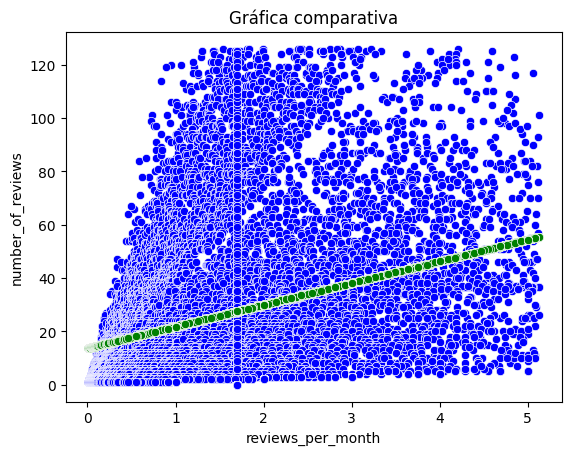

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x="reviews_per_month",y="number_of_reviews",color="blue",data=dfmx_entirehome_clean)
sns.scatterplot(x="reviews_per_month",y="prediction_number_of_reviews",color="green",data=dfmx_entirehome_clean)
plt.title("Gráfica comparativa")

In [ ]:
#Coeficiente de determinación de nuestro modelo (R^2)
coef_Deter_1 = model_1.score(X=vars_indep_1, y=var_dep_1)
coef_Deter_1

0.10930354261417219

In [ ]:
#Coeficiente de correlación de nuestro modelo
coef_Correl_1 = np.sqrt(coef_Deter_1)
coef_Correl_1 #El modelo presenta una correlación alta positiva

0.3306108628193759

#**Análisis** del frame del archivo **"df_México.csv"** con las filas **"Private room"**

In [ ]:
#Correlación entre todas las variables dentro del frame
Corr_Factors_2 = dfmx_privateroom_clean.corr()
Corr_Factors_2

,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
number_of_reviews,1.000000,0.188635,0.210143,-0.148498,0.036039,-0.045354,-0.072251,0.265241,-0.032893
host_acceptance_rate,0.188635,1.000000,0.242911,0.042632,-0.000105,-0.029061,0.049610,0.187146,-0.039025
host_response_rate,0.210143,0.242911,1.000000,-0.074138,0.080959,0.061947,0.013548,0.072132,0.102049
price,-0.148498,0.042632,-0.074138,1.000000,0.020259,0.060871,0.123850,0.004835,-0.048965
review_scores_location,0.036039,-0.000105,0.080959,0.020259,1.000000,0.402274,-0.080360,-0.232270,0.476928
review_scores_cleanliness,-0.045354,-0.029061,0.061947,0.060871,0.402274,1.000000,-0.060339,-0.205689,0.526045
availability_365,-0.072251,0.049610,0.013548,0.123850,-0.080360,-0.060339,1.000000,0.069086,-0.086191
reviews_per_month,0.265241,0.187146,0.072132,0.004835,-0.232270,-0.205689,0.069086,1.000000,-0.283530
review_scores_communication,-0.032893,-0.039025,0.102049,-0.048965,0.476928,0.526045,-0.086191,-0.283530,1.000000


<Axes: >

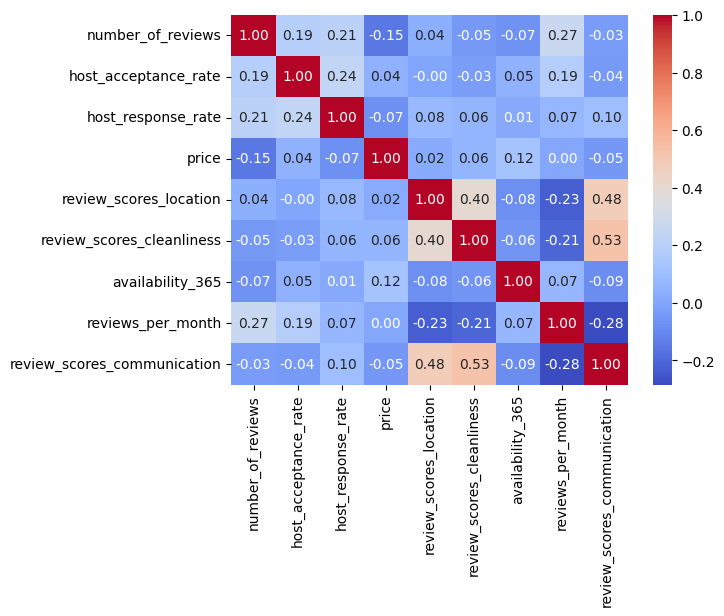

In [ ]:
#Mapa de calor de los coeficiente de correlación con el valor
Heat_Map_2 = sns.heatmap(Corr_Factors_2, cmap = "coolwarm", annot=True, fmt=".2f")
Heat_Map_2

In [ ]:
#Definimoss las variables
vars_indep_2 = dfmx_privateroom_clean[["reviews_per_month"]] #Siempre llleva doble corchete porque essta puede ser una o más columnas
var_dep_2 = dfmx_privateroom_clean["number_of_reviews"] #La variable dependiente como solo puede ser una columna unicamente lleva unos corchetes

In [ ]:
#Seleccionamos el modelo a utilizar (regresión lineal)
from sklearn.linear_model import LinearRegression #importamos el modelo

model_2 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables previamente declaradas
model_2.fit(X=vars_indep_2,y=var_dep_2) #X debe de ir en mayúsculas

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos
model_2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([4.98382466]),
 'rank_': 1,
 'singular_': array([76.07728859]),
 'intercept_': 7.929223245882623}

##**Modelo matemático: y = 4.98382466x + 7.929223245882623**

In [ ]:
#Predicción del total de accidentes según el alcohol.
y_pred_2 = model_2.predict(X=dfmx_privateroom_clean[["reviews_per_month"]])
y_pred_2 #Nos regressa una lista con cada una de las predicciones elaboradas con lo valores de alcohol en el frame

array([12.61401843,  8.12857623,  8.12857623, ..., 16.40172517,
       16.40172517, 16.40172517])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
dfmx_privateroom_clean.insert(0,"prediction_number_of_reviews",y_pred_2)
dfmx_privateroom_clean

,prediction_number_of_reviews,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
7,12.614018,36.59,100.00,100.00,1089.00,4.94,4.90,168,0.94,4.95
16,8.128576,5.00,91.46,94.54,726.00,4.80,4.75,363,0.04,4.60
17,8.128576,5.00,91.46,94.54,375.00,4.83,4.60,284,0.04,4.80
18,16.401725,0.00,91.46,94.54,1902.68,4.83,4.75,365,1.70,4.82
21,16.401725,0.00,91.46,100.00,1244.00,4.83,4.75,88,1.70,4.82
...,...,...,...,...,...,...,...,...,...,...
24200,16.401725,0.00,91.46,94.54,1280.00,4.83,4.75,301,1.70,4.82
24213,16.401725,0.00,91.46,94.54,750.00,4.83,4.75,176,1.70,4.82
24215,16.401725,0.00,100.00,100.00,600.00,4.83,4.75,345,1.70,4.82
24218,16.401725,0.00,100.00,94.54,251.00,4.83,4.75,364,1.70,4.82


Text(0.5, 1.0, 'Gráfica comparativa')

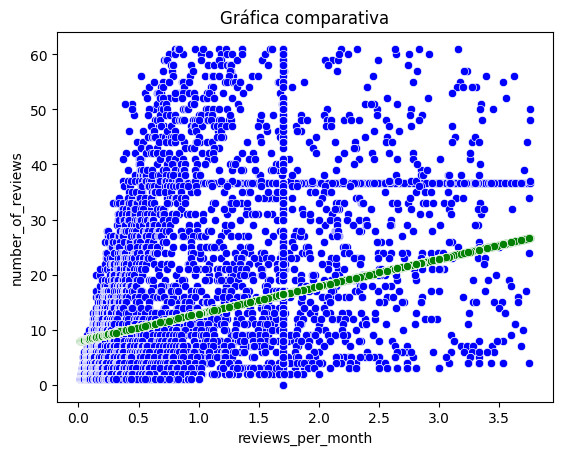

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x="reviews_per_month",y="number_of_reviews",color="blue",data=dfmx_privateroom_clean)
sns.scatterplot(x="reviews_per_month",y="prediction_number_of_reviews",color="green",data=dfmx_privateroom_clean)
plt.title("Gráfica comparativa")

In [ ]:
#Coeficiente de determinación de nuestro modelo (R^2)
coef_Deter_2 = model_2.score(X=vars_indep_2, y=var_dep_2)
coef_Deter_2

0.07035275376700112

In [ ]:
#Coeficiente de correlación de nuestro modelo
coef_Correl_2 = np.sqrt(coef_Deter_2)
coef_Correl_2 #El modelo presenta una correlación alta positiva

0.26524093531542436

#**Análisis** del frame del archivo **"df_México.csv"** con las filas **"Shared room" y "Hotel room**

##DataFrame preprocesada para Hotel room y shared room

In [ ]:
dfmx = pd.read_csv("DF_Mexico.csv")

dfmx_Hotelroom = dfmx[columnas][dfmx["room_type"]=="Hotel room"]

dfmx_sharedroom = dfmx[columnas][dfmx["room_type"]=="Shared room"]



#Identificación de valores nulos de ambos frames


print("Datos nulos:")
print()
print(dfmx_Hotelroom.isnull().sum())
print()
print(dfmx_sharedroom.isnull().sum())
print()

dfmx_Hotelroom_sinnulos = dfmx_Hotelroom.fillna(round(dfmx[columnas].mean(),2))
dfmx_sharedroom_sinnulos =dfmx_sharedroom.fillna(round(dfmx[columnas].mean(),2))


print("Comprobación Datos nulos:")
print()
print(dfmx_Hotelroom_sinnulos .isnull().sum())
print()
print(dfmx_sharedroom_sinnulos.isnull().sum())
print()

Datos nulos:

number_of_reviews               0
host_acceptance_rate            5
host_response_rate              9
price                           0
review_scores_location         26
review_scores_cleanliness      26
availability_365                0
reviews_per_month              25
review_scores_communication    26
dtype: int64

number_of_reviews                0
host_acceptance_rate            38
host_response_rate              58
price                            0
review_scores_location         105
review_scores_cleanliness      105
availability_365                 0
reviews_per_month              103
review_scores_communication    105
dtype: int64

Comprobación Datos nulos:

number_of_reviews              0
host_acceptance_rate           5
host_response_rate             9
price                          0
review_scores_location         0
review_scores_cleanliness      0
availability_365               0
reviews_per_month              0
review_scores_communication    0
dtype: int64


<ipython-input-34-734078701491>:19: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfmx_Hotelroom_sinnulos = dfmx_Hotelroom.fillna(round(dfmx[columnas].mean(),2))
<ipython-input-34-734078701491>:20: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfmx_sharedroom_sinnulos =dfmx_sharedroom.fillna(round(dfmx[columnas].mean(),2))


<Figure size 1500x800 with 0 Axes>

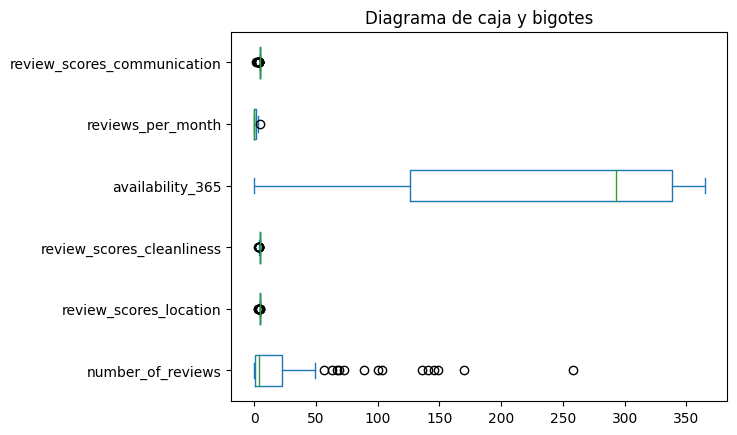

<Figure size 1500x800 with 0 Axes>

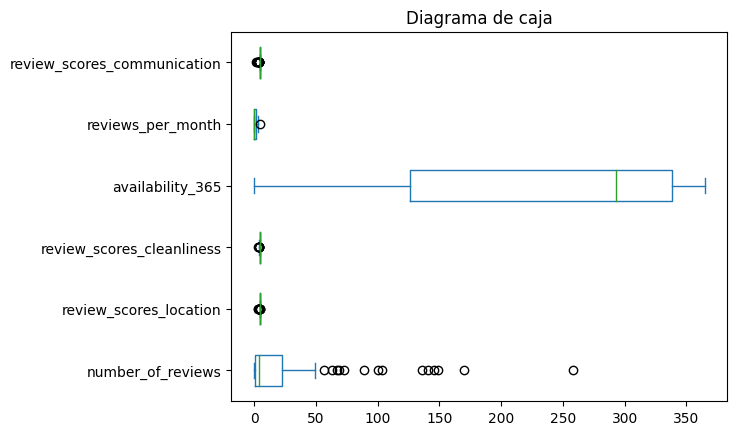

Límite superior:
number_of_reviews               56.0
review_scores_location           5.3
review_scores_cleanliness        5.4
availability_365               657.2
reviews_per_month                4.1
review_scores_communication      5.3
dtype: float64

Límite inferior:
number_of_reviews              -32.0
review_scores_location           4.6
review_scores_cleanliness        4.2
availability_365              -192.8
reviews_per_month               -2.3
review_scores_communication      4.4
dtype: float64
Outliers:
number_of_reviews               14
host_acceptance_rate           127
host_response_rate             127
price                          127
review_scores_location          13
review_scores_cleanliness        7
availability_365                 0
reviews_per_month                1
review_scores_communication     13
dtype: int64
Comprobación outliers:
number_of_reviews                0
host_acceptance_rate           127
host_response_rate             127
price                    

<ipython-input-35-f30a7d632c56>:17: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile25 = y.quantile(0.25)
<ipython-input-35-f30a7d632c56>:18: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile75 = y.quantile(0.75)
<ipython-input-35-f30a7d632c56>:31: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfmx_Hotelroom_sinnulos_sinoutliers = dfmx_Hotelroom_sinnulos[(dfmx_Hotelroom_sinnulos<=limite_superior_iqr)&(dfmx_Hotelroom_sinnulos>=limite_inferior_iqr)]
<ipyth

In [ ]:
#Hotel Room

fig = plt.figure(figsize=(15,8))
dfmx_Hotelroom_sinnulos.plot(kind="box",vert=False)
plt.title("Diagrama de caja y bigotes")
plt.show()

fig = plt.figure(figsize=(15,8))
dfmx_Hotelroom_sinnulos.plot(kind="box",vert=False)
plt.title("Diagrama de caja")
plt.show()



y = dfmx_Hotelroom_sinnulos

percentile25 = y.quantile(0.25)
percentile75 = y.quantile(0.75)

iqr = percentile75 - percentile25

limite_superior_iqr = percentile75 + 1.5*iqr
limite_inferior_iqr = percentile25 - 1.5*iqr
print("Límite superior:")
print(round(limite_superior_iqr,1))
print()
print("Límite inferior:")
print(round(limite_inferior_iqr,1))


dfmx_Hotelroom_sinnulos_sinoutliers = dfmx_Hotelroom_sinnulos[(dfmx_Hotelroom_sinnulos<=limite_superior_iqr)&(dfmx_Hotelroom_sinnulos>=limite_inferior_iqr)]

print("Outliers:")
print(dfmx_Hotelroom_sinnulos_sinoutliers.isnull().sum())



dfmx_Hotelroom_clean = dfmx_Hotelroom_sinnulos_sinoutliers.copy()
dfmx_Hotelroom_clean = dfmx_Hotelroom_clean.fillna(round(dfmx[columnas].mean(),2))

#Comprobación de la eliminación de outliers
print("Comprobación outliers:")
print(dfmx_Hotelroom_clean.isnull().sum())


print(dfmx_Hotelroom_clean)

<Figure size 1500x800 with 0 Axes>

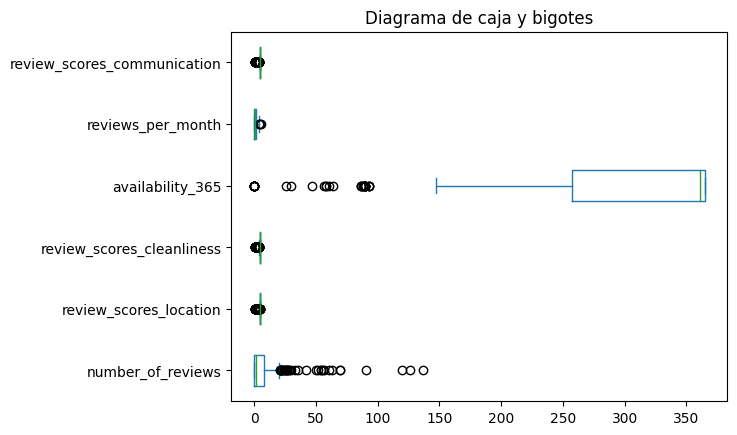

<Figure size 1500x800 with 0 Axes>

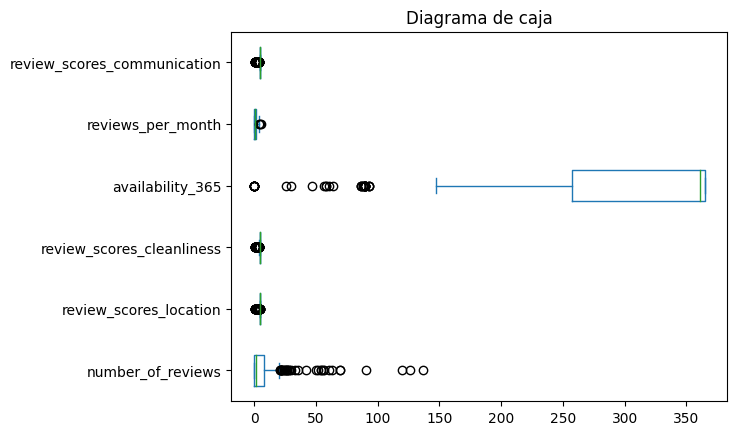

Límite superior:
number_of_reviews               20.0
review_scores_location           5.3
review_scores_cleanliness        5.1
availability_365               527.0
reviews_per_month                4.0
review_scores_communication      5.3
dtype: float64

Límite inferior:
number_of_reviews             -12.0
review_scores_location          4.6
review_scores_cleanliness       4.3
availability_365               95.0
reviews_per_month              -2.0
review_scores_communication     4.4
dtype: float64
Outliers:
number_of_reviews               35
host_acceptance_rate           293
host_response_rate             293
price                          293
review_scores_location          39
review_scores_cleanliness       41
availability_365                35
reviews_per_month                3
review_scores_communication     37
dtype: int64
Comprobación outliers:
number_of_reviews                0
host_acceptance_rate           293
host_response_rate             293
price                          

<ipython-input-36-bea07a34463f>:17: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile25 = y.quantile(0.25)
<ipython-input-36-bea07a34463f>:18: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  percentile75 = y.quantile(0.75)
<ipython-input-36-bea07a34463f>:31: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfmx_sharedroom_sinnulos_sinoutliers = dfmx_sharedroom_sinnulos[(dfmx_sharedroom_sinnulos<=limite_superior_iqr)&(dfmx_sharedroom_sinnulos>=limite_inferior_iqr)]
<i

In [ ]:
#Shared room

fig = plt.figure(figsize=(15,8))
dfmx_sharedroom_sinnulos.plot(kind="box",vert=False)
plt.title("Diagrama de caja y bigotes")
plt.show()

fig = plt.figure(figsize=(15,8))
dfmx_sharedroom_sinnulos.plot(kind="box",vert=False)
plt.title("Diagrama de caja")
plt.show()



y = dfmx_sharedroom_sinnulos

percentile25 = y.quantile(0.25)
percentile75 = y.quantile(0.75)

iqr = percentile75 - percentile25

limite_superior_iqr = percentile75 + 1.5*iqr
limite_inferior_iqr = percentile25 - 1.5*iqr
print("Límite superior:")
print(round(limite_superior_iqr,1))
print()
print("Límite inferior:")
print(round(limite_inferior_iqr,1))


dfmx_sharedroom_sinnulos_sinoutliers = dfmx_sharedroom_sinnulos[(dfmx_sharedroom_sinnulos<=limite_superior_iqr)&(dfmx_sharedroom_sinnulos>=limite_inferior_iqr)]

print("Outliers:")
print(dfmx_sharedroom_sinnulos_sinoutliers.isnull().sum())



dfmx_Sharesroom_clean = dfmx_sharedroom_sinnulos_sinoutliers.copy()
dfmx_Sharesroom_clean = dfmx_Sharesroom_clean.fillna(round(dfmx[columnas].mean(),2))

#Comprobación de la eliminación de outliers
print("Comprobación outliers:")
print(dfmx_Sharesroom_clean.isnull().sum())


print(dfmx_Sharesroom_clean)

##DataFrame del archivo "df_México.csv" con las filas "Hotel room"


In [ ]:
Corr_Factors = dfmx_Hotelroom_clean.corr()
Corr_Factors

<ipython-input-37-388e3d3e8675>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors = dfmx_Hotelroom_clean.corr()


,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
number_of_reviews,1.000000,0.039146,-0.167571,0.072891,0.254824,-0.149516
review_scores_location,0.039146,1.000000,0.690753,0.127333,-0.341387,0.600563
review_scores_cleanliness,-0.167571,0.690753,1.000000,0.124953,-0.281512,0.526189
availability_365,0.072891,0.127333,0.124953,1.000000,-0.180633,0.086456
reviews_per_month,0.254824,-0.341387,-0.281512,-0.180633,1.000000,-0.314112
review_scores_communication,-0.149516,0.600563,0.526189,0.086456,-0.314112,1.000000


<Axes: >

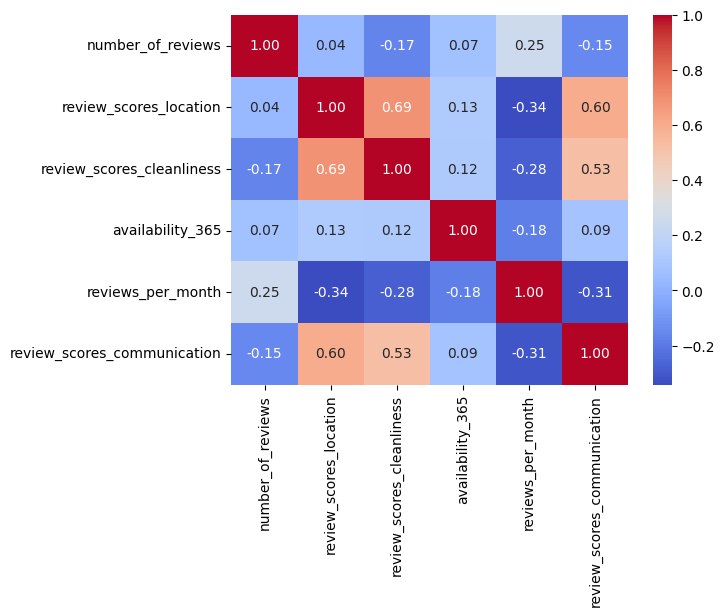

In [ ]:
Heat_Map = sns.heatmap(Corr_Factors, cmap = "coolwarm", annot=True, fmt=".2f")
Heat_Map

In [ ]:
vars_indep = dfmx_Hotelroom_clean[["review_scores_cleanliness"]]
var_dep = dfmx_Hotelroom_clean["review_scores_location"]

from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X=vars_indep,y=var_dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.35261848]),
 'rank_': 1,
 'singular_': array([2.04986191]),
 'intercept_': 3.211368070869508}

Modelo  y = 0.35261848x + 3.211368070869508

In [ ]:
#Predicción
y_pred = model.predict(X=dfmx_Hotelroom_clean[["review_scores_cleanliness"]])
y_pred
dfmx_Hotelroom_clean.insert(0,"prediction_number_of_reviews_scores_cleanliness",y_pred)
dfmx_Hotelroom_clean

,prediction_number_of_reviews_scores_cleanliness,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
14,4.914515,23.0,NaN,NaN,NaN,4.83,4.83,340,0.18,5.00
53,4.953303,31.0,NaN,NaN,NaN,4.97,4.94,332,0.25,5.00
55,4.946251,49.0,NaN,NaN,NaN,5.00,4.92,350,0.46,5.00
62,4.956830,22.0,NaN,NaN,NaN,4.95,4.95,356,0.25,5.00
66,4.974460,7.0,NaN,NaN,NaN,5.00,5.00,287,0.07,5.00
...,...,...,...,...,...,...,...,...,...,...
9495,4.974460,3.0,NaN,NaN,NaN,5.00,5.00,0,0.12,5.00
9537,4.886306,0.0,NaN,NaN,NaN,4.83,4.75,0,1.70,4.82
9539,4.886306,0.0,NaN,NaN,NaN,4.83,4.75,0,1.70,4.82
9544,4.886306,0.0,NaN,NaN,NaN,4.83,4.75,0,1.70,4.82


0.477140030446073


0.6907532341191556

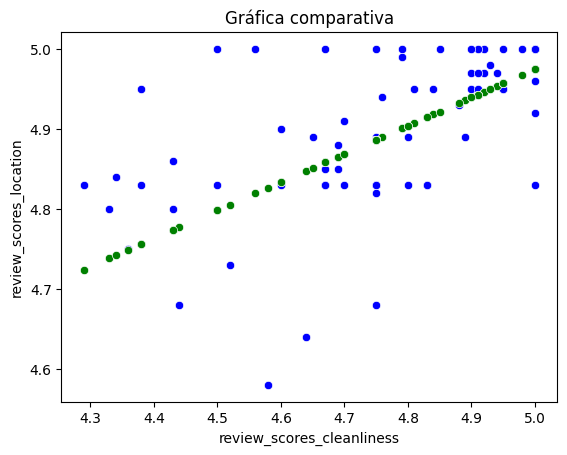

In [ ]:
sns.scatterplot(x="review_scores_cleanliness",y="review_scores_location",color="blue",data=dfmx_Hotelroom_clean)
sns.scatterplot(x="review_scores_cleanliness",y="prediction_number_of_reviews_scores_cleanliness",color="green",data=dfmx_Hotelroom_clean)
plt.title("Gráfica comparativa")


coef_Deter = model.score(X=vars_indep, y=var_dep)
print(coef_Deter)

coef_Correl = np.sqrt(coef_Deter)
coef_Correl

##DataFrame del archivo "df_México.csv" con las filas "Shared room "

In [ ]:
Corr_Factors = dfmx_Sharesroom_clean.corr()
Corr_Factors

<ipython-input-42-34fb152bfe2d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Corr_Factors = dfmx_Sharesroom_clean.corr()


,number_of_reviews,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
number_of_reviews,1.000000,-0.037765,-0.299064,-0.103972,0.109756,-0.139749
review_scores_location,-0.037765,1.000000,0.261874,-0.016636,-0.290672,0.300218
review_scores_cleanliness,-0.299064,0.261874,1.000000,-0.048277,-0.134489,0.432864
availability_365,-0.103972,-0.016636,-0.048277,1.000000,0.076230,0.036784
reviews_per_month,0.109756,-0.290672,-0.134489,0.076230,1.000000,-0.167358
review_scores_communication,-0.139749,0.300218,0.432864,0.036784,-0.167358,1.000000


<Axes: >

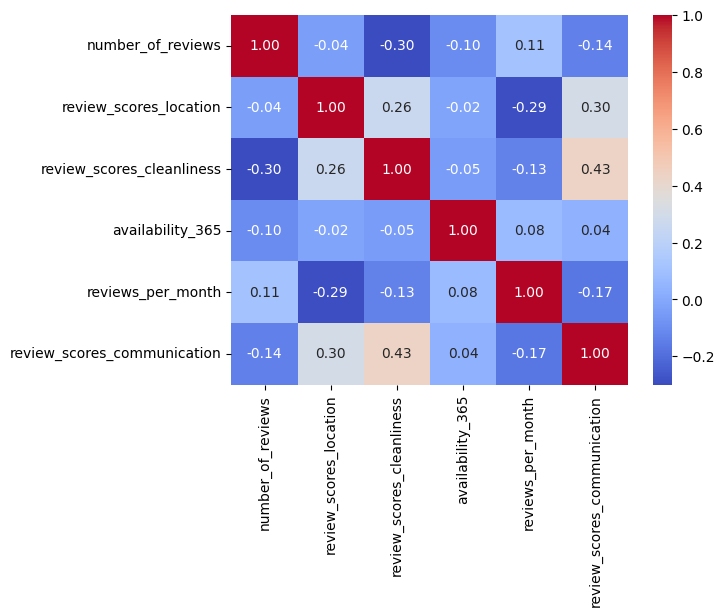

In [ ]:
Heat_Map = sns.heatmap(Corr_Factors, cmap = "coolwarm", annot=True, fmt=".2f")
Heat_Map

In [ ]:
vars_indep = dfmx_Sharesroom_clean[["review_scores_cleanliness"]]
var_dep = dfmx_Sharesroom_clean["review_scores_communication"]

from sklearn.linear_model import LinearRegression

model = LinearRegression()


model.fit(X=vars_indep,y=var_dep)

model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.34393459]),
 'rank_': 1,
 'singular_': array([2.62829432]),
 'intercept_': 3.207160704335592}

Modelo   y= 0.34393459x + 3.207160704335592

In [ ]:
#Predicción
y_pred = model.predict(X=dfmx_Sharesroom_clean[["review_scores_cleanliness"]])
y_pred
dfmx_Sharesroom_clean.insert(0,"prediction_number_of_reviews_scores_cleanliness",y_pred)
dfmx_Sharesroom_clean

,prediction_number_of_reviews_scores_cleanliness,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
174,4.840850,0.00,NaN,NaN,NaN,4.83,4.75,365.0,1.70,4.82
437,4.813335,9.00,NaN,NaN,NaN,4.78,4.67,346.0,0.10,5.00
443,4.902758,36.59,NaN,NaN,NaN,4.68,4.93,302.0,0.73,4.91
472,4.747988,36.59,NaN,NaN,NaN,4.80,4.48,354.0,0.26,4.72
499,4.796139,36.59,NaN,NaN,NaN,4.90,4.62,351.0,1.47,4.90
...,...,...,...,...,...,...,...,...,...,...
23733,4.840850,0.00,NaN,NaN,NaN,4.83,4.75,365.0,1.70,4.82
23762,4.840850,0.00,NaN,NaN,NaN,4.83,4.75,364.0,1.70,4.82
23894,4.840850,0.00,NaN,NaN,NaN,4.83,4.75,364.0,1.70,4.82
23898,4.840850,0.00,NaN,NaN,NaN,4.83,4.75,364.0,1.70,4.82


0.18737107323866153


0.4328638044912759

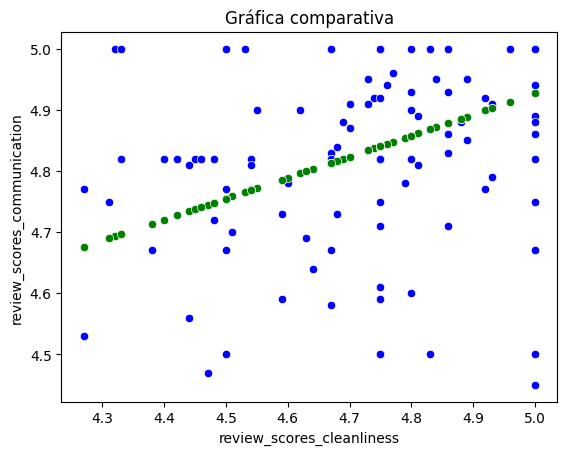

In [ ]:
sns.scatterplot(x="review_scores_cleanliness",y="review_scores_communication",color="blue",data=dfmx_Sharesroom_clean)
sns.scatterplot(x="review_scores_cleanliness",y="prediction_number_of_reviews_scores_cleanliness",color="green",data=dfmx_Sharesroom_clean)
plt.title("Gráfica comparativa")


coef_Deter = model.score(X=vars_indep, y=var_dep)
print(coef_Deter)

coef_Correl = np.sqrt(coef_Deter)
coef_Correl

#**Análisis** del frame del archivo **"California_eua.csv"** con las filas **"Entire home/apt"**

In [ ]:
#Encontramos la mejor correlación
corr_factors_3 = dfeua_entirehome_clean.corr()
corr_factors_3

,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
number_of_reviews,1.000000,0.172138,0.136935,0.034866,-0.040088,0.081628,-0.135422,0.340291,0.116114
host_acceptance_rate,0.172138,1.000000,0.161482,0.005119,0.027564,0.063822,-0.039641,0.137197,0.081936
host_response_rate,0.136935,0.161482,1.000000,-0.003822,0.012592,0.074959,-0.050484,0.133949,0.092039
price,0.034866,0.005119,-0.003822,1.000000,0.094177,0.076927,-0.084600,0.089624,0.077807
review_scores_location,-0.040088,0.027564,0.012592,0.094177,1.000000,0.331766,-0.053187,-0.239522,0.379165
review_scores_cleanliness,0.081628,0.063822,0.074959,0.076927,0.331766,1.000000,-0.110884,-0.070585,0.476589
availability_365,-0.135422,-0.039641,-0.050484,-0.084600,-0.053187,-0.110884,1.000000,-0.090765,-0.146360
reviews_per_month,0.340291,0.137197,0.133949,0.089624,-0.239522,-0.070585,-0.090765,1.000000,-0.155861
review_scores_communication,0.116114,0.081936,0.092039,0.077807,0.379165,0.476589,-0.146360,-0.155861,1.000000


In [ ]:
#Encontramos la mejor correlación
corr_factors_3 = abs(corr_factors_3)
corr_factors_3

,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
number_of_reviews,1.000000,0.172138,0.136935,0.034866,0.040088,0.081628,0.135422,0.340291,0.116114
host_acceptance_rate,0.172138,1.000000,0.161482,0.005119,0.027564,0.063822,0.039641,0.137197,0.081936
host_response_rate,0.136935,0.161482,1.000000,0.003822,0.012592,0.074959,0.050484,0.133949,0.092039
price,0.034866,0.005119,0.003822,1.000000,0.094177,0.076927,0.084600,0.089624,0.077807
review_scores_location,0.040088,0.027564,0.012592,0.094177,1.000000,0.331766,0.053187,0.239522,0.379165
review_scores_cleanliness,0.081628,0.063822,0.074959,0.076927,0.331766,1.000000,0.110884,0.070585,0.476589
availability_365,0.135422,0.039641,0.050484,0.084600,0.053187,0.110884,1.000000,0.090765,0.146360
reviews_per_month,0.340291,0.137197,0.133949,0.089624,0.239522,0.070585,0.090765,1.000000,0.155861
review_scores_communication,0.116114,0.081936,0.092039,0.077807,0.379165,0.476589,0.146360,0.155861,1.000000


<Axes: >

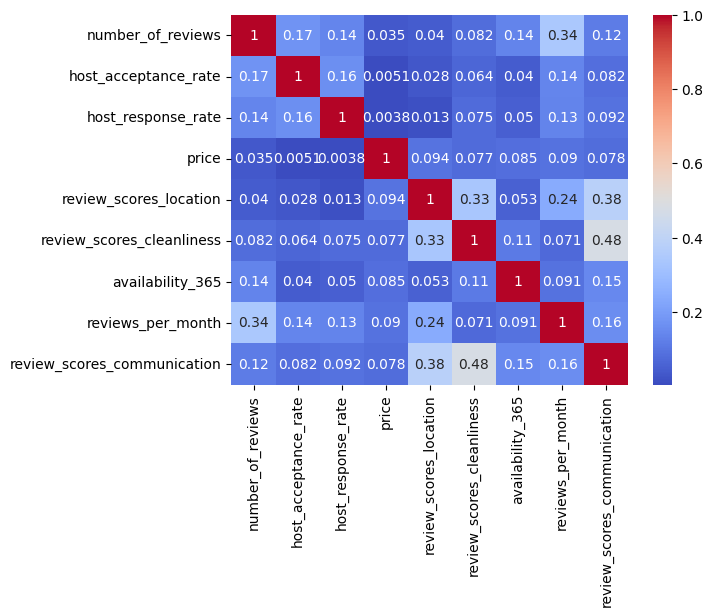

In [ ]:
#Graficamos el mapa de calor de los coeficientes de correlación
Heat_Map_3 = sns.heatmap(corr_factors_3, cmap = 'coolwarm', annot=True)
Heat_Map_3

In [ ]:
Vars_Indep_3 = dfeua_entirehome_clean[['reviews_per_month']]
Var_Dep_3 = dfeua_entirehome_clean['number_of_reviews']

In [ ]:
#Seleccionamos el modelo a utilizar (regresión lineal)
from sklearn.linear_model import LinearRegression #importamos el modelo

model_3 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_3.fit(X=Vars_Indep_3, y=Var_Dep_3)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model_3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([11.95464738]),
 'rank_': 1,
 'singular_': array([44.47039645]),
 'intercept_': 9.145656826843696}

##**Modelo matemático: y= 11.95464738 + 9.145656826843696**

In [ ]:
y_pred_3 = model_3.predict(X=dfeua_entirehome_clean[['reviews_per_month']])
y_pred_3

array([36.76089228, 17.0357241 , 11.17794688, ..., 24.92579137,
       21.10030421, 24.92579137])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
dfeua_entirehome_clean.insert(0,'number_of_reviews_predic',y_pred_3)
dfeua_entirehome_clean

,number_of_reviews_predic,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
0,36.760892,47.94,100.00,100.00,202.00,4.98,4.92,128,2.31,4.88
1,17.035724,47.94,71.00,95.64,235.00,4.77,4.87,365,0.66,4.85
3,11.177947,28.00,88.01,100.00,330.09,4.94,5.00,365,0.17,5.00
5,29.349011,47.94,95.00,100.00,259.00,4.78,4.88,32,1.69,4.97
8,14.405702,56.00,61.00,100.00,425.00,4.91,4.86,7,0.44,4.91
...,...,...,...,...,...,...,...,...,...,...
6923,24.925791,0.00,100.00,100.00,110.00,4.79,4.77,26,1.32,4.85
6928,24.925791,0.00,88.01,100.00,175.00,4.79,4.77,248,1.32,4.85
6931,24.925791,0.00,100.00,100.00,164.00,4.79,4.77,57,1.32,4.85
6932,21.100304,1.00,88.01,95.64,228.00,5.00,5.00,356,1.00,5.00


<Axes: xlabel='reviews_per_month', ylabel='number_of_reviews'>

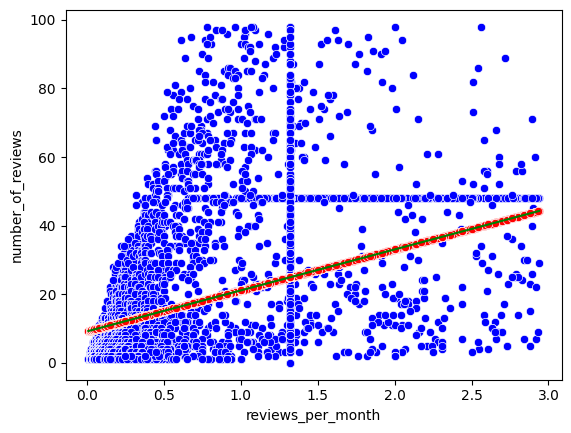

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='reviews_per_month', y='number_of_reviews', color='blue', data=dfeua_entirehome_clean)
sns.scatterplot(x='reviews_per_month', y='number_of_reviews_predic', color='red', data=dfeua_entirehome_clean)
sns.lineplot(x='reviews_per_month', y='number_of_reviews_predic', color='green', data=dfeua_entirehome_clean)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter_3 = model_3.score(X=Vars_Indep_3, y=Var_Dep_3)
coef_Deter_3

0.11579773268933835

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl_3 = np.sqrt(coef_Deter_3)
coef_Correl_3

0.34029065912736767

#**Análisis** del frame del archivo **"California_eua.csv"** con las filas **"Private room"**

In [ ]:
#Encontramos la mejor correlación
corr_factors_4 = dfeua_privateroom_clean.corr()
corr_factors_4

,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
number_of_reviews,1.000000,0.205499,0.180665,-0.135617,-0.109811,-0.043407,-0.112966,0.446312,-0.033545
host_acceptance_rate,0.205499,1.000000,0.215394,-0.068828,-0.046852,-0.004956,0.155657,0.253815,-0.036980
host_response_rate,0.180665,0.215394,1.000000,-0.130250,0.000761,0.106860,0.060033,0.207372,0.143671
price,-0.135617,-0.068828,-0.130250,1.000000,0.172674,0.142529,-0.009573,-0.075163,0.030993
review_scores_location,-0.109811,-0.046852,0.000761,0.172674,1.000000,0.315601,-0.099626,-0.178486,0.367305
review_scores_cleanliness,-0.043407,-0.004956,0.106860,0.142529,0.315601,1.000000,-0.120579,-0.009296,0.479181
availability_365,-0.112966,0.155657,0.060033,-0.009573,-0.099626,-0.120579,1.000000,-0.001571,-0.152884
reviews_per_month,0.446312,0.253815,0.207372,-0.075163,-0.178486,-0.009296,-0.001571,1.000000,-0.159577
review_scores_communication,-0.033545,-0.036980,0.143671,0.030993,0.367305,0.479181,-0.152884,-0.159577,1.000000


In [ ]:
#Encontramos la mejor correlación
corr_factors_4 = abs(corr_factors_4)
corr_factors_4

,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
number_of_reviews,1.000000,0.205499,0.180665,0.135617,0.109811,0.043407,0.112966,0.446312,0.033545
host_acceptance_rate,0.205499,1.000000,0.215394,0.068828,0.046852,0.004956,0.155657,0.253815,0.036980
host_response_rate,0.180665,0.215394,1.000000,0.130250,0.000761,0.106860,0.060033,0.207372,0.143671
price,0.135617,0.068828,0.130250,1.000000,0.172674,0.142529,0.009573,0.075163,0.030993
review_scores_location,0.109811,0.046852,0.000761,0.172674,1.000000,0.315601,0.099626,0.178486,0.367305
review_scores_cleanliness,0.043407,0.004956,0.106860,0.142529,0.315601,1.000000,0.120579,0.009296,0.479181
availability_365,0.112966,0.155657,0.060033,0.009573,0.099626,0.120579,1.000000,0.001571,0.152884
reviews_per_month,0.446312,0.253815,0.207372,0.075163,0.178486,0.009296,0.001571,1.000000,0.159577
review_scores_communication,0.033545,0.036980,0.143671,0.030993,0.367305,0.479181,0.152884,0.159577,1.000000


<Axes: >

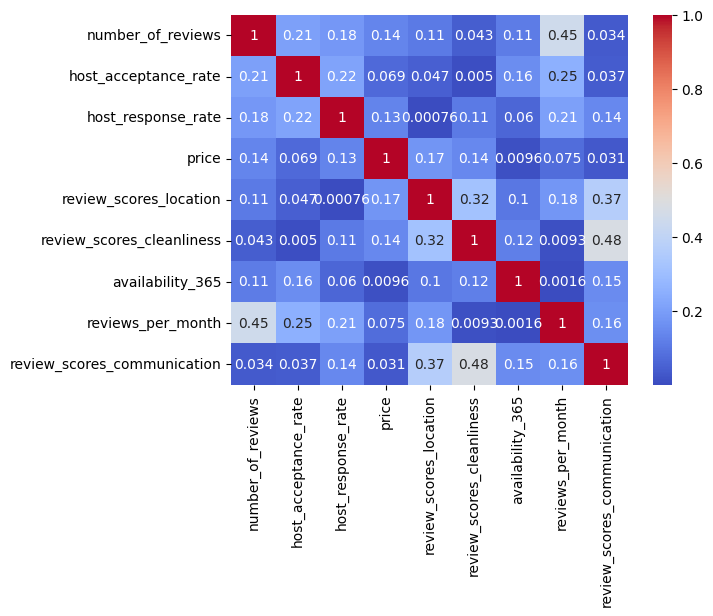

In [ ]:
#Graficamos el mapa de calor de los coeficientes de correlación
Heat_Map_4 = sns.heatmap(corr_factors_4, cmap = 'coolwarm', annot=True)
Heat_Map_4

In [ ]:
Vars_Indep_4 = dfeua_privateroom_clean[['reviews_per_month']]
Var_Dep_4 = dfeua_privateroom_clean['number_of_reviews']

In [ ]:
#Seleccionamos el modelo a utilizar (regresión lineal)
from sklearn.linear_model import LinearRegression #importamos el modelo

model_4 = LinearRegression()

In [ ]:
#Ajustamos el modelo con las variables antes declaradas
model_4.fit(X=Vars_Indep_4, y=Var_Dep_4)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modelo ajustado
model_4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['reviews_per_month'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([19.75870152]),
 'rank_': 1,
 'singular_': array([39.91872258]),
 'intercept_': 7.678039345454987}

##**Modelo matemático: y= 19.75870152 + 7.678039345454987**

In [ ]:
y_pred_4 = model_4.predict(X=dfeua_privateroom_clean[['reviews_per_month']])
y_pred_4

array([ 9.45632248, 33.75952536, 22.29947847, ..., 33.75952536,
       33.75952536, 33.75952536])

In [ ]:
#Insertamos la columna de predicciones en el DataFrame
dfeua_privateroom_clean.insert(0,'number_of_reviews_predic',y_pred_4)
dfeua_privateroom_clean

,number_of_reviews_predic,number_of_reviews,host_acceptance_rate,host_response_rate,price,review_scores_location,review_scores_cleanliness,availability_365,reviews_per_month,review_scores_communication
2,9.456322,9.00,73.00,100.00,56.0,4.67,4.44,365,0.09,4.78
4,33.759525,47.94,90.00,100.00,110.0,4.93,4.94,159,1.32,4.96
6,22.299478,80.00,88.01,100.00,100.0,4.77,4.75,331,0.74,4.78
7,10.049084,19.00,100.00,100.00,95.0,4.79,5.00,365,0.12,5.00
11,24.472936,121.00,100.00,100.00,55.0,4.82,4.45,55,0.85,4.81
...,...,...,...,...,...,...,...,...,...,...
6927,27.436741,1.00,98.00,100.00,80.0,5.00,5.00,316,1.00,5.00
6929,33.759525,0.00,97.00,100.00,40.0,4.79,4.77,336,1.32,4.85
6930,33.759525,0.00,100.00,100.00,56.0,4.79,4.77,339,1.32,4.85
6933,33.759525,0.00,88.01,95.64,104.0,4.79,4.77,364,1.32,4.85


<Axes: xlabel='reviews_per_month', ylabel='number_of_reviews'>

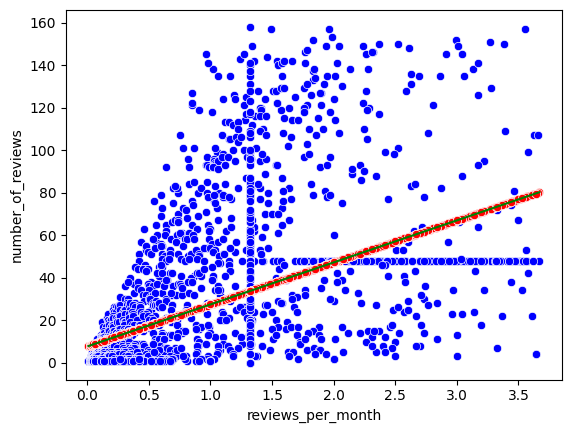

In [ ]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido
sns.scatterplot(x='reviews_per_month', y='number_of_reviews', color='blue', data=dfeua_privateroom_clean)
sns.scatterplot(x='reviews_per_month', y='number_of_reviews_predic', color='red', data=dfeua_privateroom_clean)
sns.lineplot(x='reviews_per_month', y='number_of_reviews_predic', color='green', data=dfeua_privateroom_clean)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter_4 = model_4.score(X=Vars_Indep_4, y=Var_Dep_4)
coef_Deter_4

0.19919469669228118

In [ ]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl_4 = np.sqrt(coef_Deter_4)
coef_Correl_4

0.44631233087635075

#Tabla comparativa

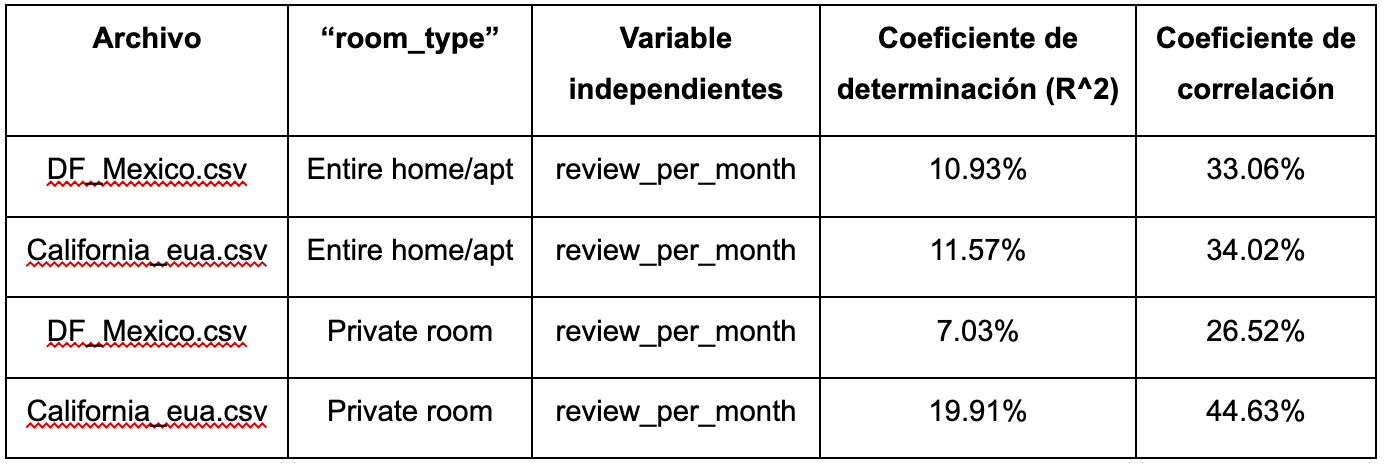

In [ ]:
%%shell
jupyter nbconvert --to html Actividad5_Equipo3.ipynb

[NbConvertApp] Converting notebook Actividad5_Equipo3.ipynb to html
[NbConvertApp] Writing 2755569 bytes to Actividad5_Equipo3.html
